In [75]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time

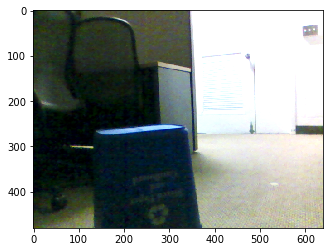

In [76]:
rgb = np.load("data/8_col.npy")
dep = np.load("data/8_d.npy")
plt.imshow(rgb)
plt.show()

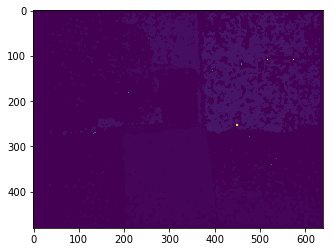

In [77]:
plt.imshow(dep)
plt.show()

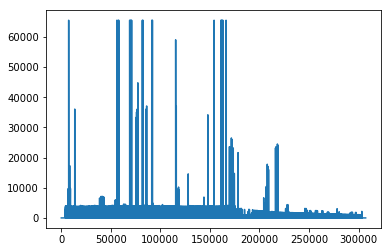

In [78]:
plt.plot(dep.flatten())
plt.show()

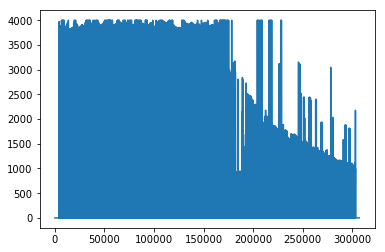

0.6497428385416667


In [79]:
dep_n = dep.flatten()
zero_count = 0
for i, val in enumerate(dep_n):
    if val == 0:
        zero_count += 1
    if val > 4000.0:
        dep_n[i] = 4000.0
plt.plot(dep_n)
plt.show()
print(zero_count/len(dep_n))

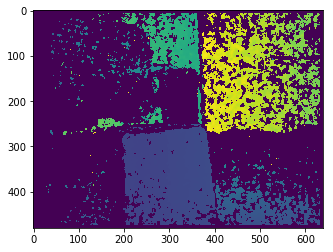

In [80]:
dep_n = dep_n.reshape(480,640)
plt.imshow(dep_n)
plt.show()

In [27]:
t = timeit.timeit("""
import numpy as np
dep = np.load("data/8_d.npy")
dep_n = dep.flatten()
zero_count = 0
for i, val in enumerate(dep_n):
    if val > 4000.0:
        dep_n[i] = 4000.0
    if val == 0:
        try:
            lower = i-1
            higher = i+1
            while(dep_n[lower]==0):
                lower = lower - 1
            while(dep_n[higher]==0):
                higher = higher + 1
            average = int((dep_n[lower] + dep_n[higher])/2)
            dep_n[i] = average
        except:
            continue

dep_n = dep_n.reshape(480,640)""",number=1)

print(t)

12.245859793009004


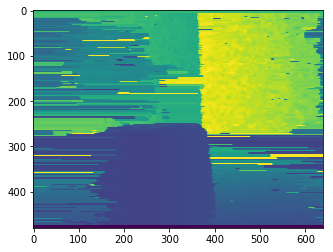

In [32]:
# average between next non-zero values
for i, val in enumerate(dep_n):
    if val == 0:
        try:
            lower = i-1
            higher = i+1
            while(dep_n[lower]==0):
                lower = lower - 1
            while(dep_n[higher]==0):
                higher = higher + 1
            average = int((dep_n[lower] + dep_n[higher])/2)
            dep_n[i] = average
        except:
            continue

dep_n = dep_n.reshape(480,640)
plt.imshow(dep_n)
plt.show()


In [81]:
counter = 0
for i, val in enumerate(dep_n.flatten()):
    if val == 0:
        counter += 1
frac = counter/len(dep_n.flatten())
print(frac)

0.6497428385416667


In [82]:
dep_n2 = np.copy(dep)    

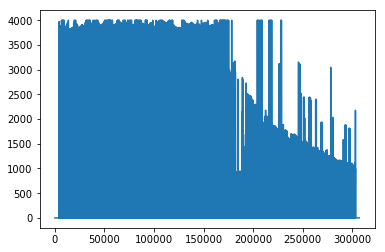

In [83]:
dep_n2 = dep_n2.flatten()
zero_count = 0
for i, val in enumerate(dep_n2):
    if val > 4000.0:
        dep_n2[i] = 4000.0
        
plt.plot(dep_n2)
plt.show()

dep_n2 = dep_n2.reshape(480,640)

In [84]:
dep_n4 = np.copy(dep_n2)
dep_n3 = np.transpose(dep_n2)
dep_n3.shape

(640, 480)

In [85]:
# average rows
len_row = 0
for i,row in enumerate(dep_n2):
    for j,val in enumerate(row):
        if val == 0:
            try:
                lower = j-1
                higher = j+1
                while(row[lower]==0):
                    lower = lower - 1
                while(row[higher]==0):
                    higher = higher + 1
                average = int((row[lower] + row[higher])/2)
                dep_n2[i,j] = average
            except:
                continue

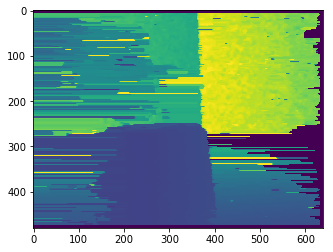

In [86]:
plt.imshow(dep_n2)
plt.show()

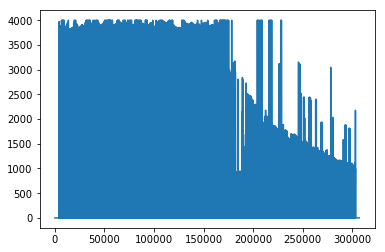

In [87]:
plt.plot(dep_n.flatten())
plt.show()

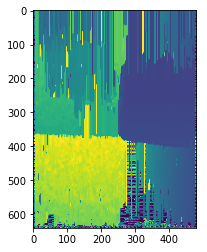

In [32]:
# average columns
dep_n3 = dep_n3.flatten()
for i, val in enumerate(dep_n3):
    if val == 0:
        try:
            lower = i-1
            higher = i+1
            while(dep_n[lower]==0):
                lower = lower - 1
            while(dep_n[higher]==0):
                higher = higher + 1
            average = int((dep_n3[lower] + dep_n3[higher])/2)
            dep_n3[i] = average
        except:
            continue
dep_n3 = dep_n3.reshape(640,480)
# dep_n3 = np.transpose(dep_n3)
plt.imshow(dep_n3)
plt.show()

SPLIT START:(480, 640)
SPLIT START:(240, 320)


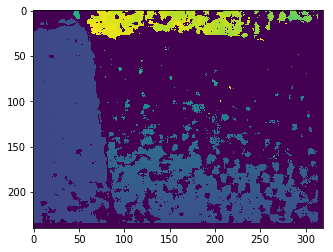

In [88]:
# split matrix into 4 submatrices
def split(matrix):
    h,w = matrix.shape
    print("SPLIT START:{}".format((h,w)))
    h_prime = int(round(h / 2,0))
    w_prime = int(round(w / 2,0))
    # new matrices
    upper_left = matrix[:h_prime,:w_prime]
    upper_right = matrix[:h_prime,w_prime:]
    lower_left = matrix[h_prime:,:w_prime]
    lower_right = matrix[h_prime:,w_prime:]
    print("SPLIT START:{}".format(lower_right.shape))
    return [upper_left,upper_right,lower_left,lower_right]

upper_left,upper_right,lower_left,lower_right = split(dep_n4)
plt.imshow(lower_right)
plt.show()

In [89]:
def average(matrix,sigma = 100):
    h,w = matrix.shape
    if matrix[matrix > 0].std() > sigma and h%2 == 0 and w%2 == 0:
        print("STD:{}".format(matrix[matrix > 0].std()))
#         matrix[matrix < 1] = matrix[matrix > 0].mean()
        submatrices = split(matrix)
        for i,mat in enumerate(submatrices):
            submatrices[i] = average(mat)
#             print("SHAPE:{}".format(submatrices[i].shape))
        horizontal1 = np.hstack((submatrices[0],submatrices[1]))
        print("SHAPE H1:{}".format(horizontal1.shape))
        horizontal2 = np.hstack((submatrices[2],submatrices[3]))
        print("SHAPE H2:{}".format(horizontal2.shape))
        matrix = np.vstack((horizontal1,horizontal2))
        return matrix
    else:
        val = matrix[matrix > 0].mean()
        print(val)
        matrix = np.full((h,w),val)
        return matrix
        

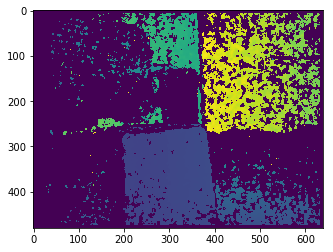

In [41]:
plt.imshow(dep_n4)
plt.show()

STD:1212.8840244583428
SPLIT START:(480, 640)
SPLIT START:(240, 320)
STD:433.603493282687
SPLIT START:(240, 320)
SPLIT START:(120, 160)
STD:386.15607431202005
SPLIT START:(120, 160)
SPLIT START:(60, 80)
STD:195.49431570825945
SPLIT START:(60, 80)
SPLIT START:(30, 40)
nan
1415.50006723
nan
STD:200.54363593550153
SPLIT START:(30, 40)
SPLIT START:(15, 20)
1362.33339804
1444.62169024
1388.53665132
1495.64292818
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
SHAPE H1:(30, 80)
SHAPE H2:(30, 80)
STD:446.2617965833187
SPLIT START:(60, 80)
SPLIT START:(30, 40)
1494.58578527
STD:419.91884433006834
SPLIT START:(30, 40)
SPLIT START:(15, 20)
nan
2781.42437453
3040.23089902
2297.95844248
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
1586.3086691
1736.86371886
SHAPE H1:(30, 80)
SHAPE H2:(30, 80)
STD:428.2737349450056
SPLIT START:(60, 80)
SPLIT START:(30, 40)
STD:313.22872081337533
SPLIT START:(30, 40)
SPLIT START:(15, 20)
nan
nan
nan
1471.66673657
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
STD:159.5751296321625
SPLIT START:(30,

/Users/janhenrikbernhard/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/janhenrikbernhard/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/janhenrikbernhard/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/janhenrikbernhard/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice.
/Users/janhenrikbernhard/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



2579.71299382
3852.17325989
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
SHAPE H1:(30, 80)
SHAPE H2:(30, 80)
3740.89526938
SHAPE H1:(60, 160)
SHAPE H2:(60, 160)
STD:170.28868026576447
SPLIT START:(120, 160)
SPLIT START:(60, 80)
STD:110.87119670876652
SPLIT START:(60, 80)
SPLIT START:(30, 40)
3567.14282018
STD:132.45244112959588
SPLIT START:(30, 40)
SPLIT START:(15, 20)
3496.67990465
3459.83464709
3455.05470956
3480.96470434
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
STD:123.05246897999181
SPLIT START:(30, 40)
SPLIT START:(15, 20)
3611.04212956
3536.13488298
3647.6699407
3523.32837248
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
3508.82979629
SHAPE H1:(30, 80)
SHAPE H2:(30, 80)
STD:122.39329558862384
SPLIT START:(60, 80)
SPLIT START:(30, 40)
STD:128.7937077197556
SPLIT START:(30, 40)
SPLIT START:(15, 20)
3345.3078512
3256.31873874
3288.42423996
3279.3421471
SHAPE H1:(15, 40)
SHAPE H2:(15, 40)
STD:121.07273875634405
SPLIT START:(30, 40)
SPLIT START:(15, 20)
3230.30856465
3128.96953637
3226.65858947
3146.1916388

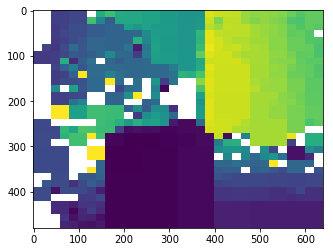

In [90]:
test = average(dep_n4)
plt.imshow(test)
plt.show()

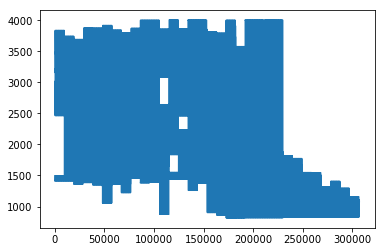

In [91]:
plt.plot(test.flatten())
plt.show()

In [92]:
np.where(np.isnan(test))

(array([  0,   0,   0, ..., 479, 479, 479]),
 array([ 0,  1,  2, ..., 57, 58, 59]))

In [96]:
# Copy in depth_completion code:
start = time.time()
x,y = np.where(np.isnan(test))
h,w = test.shape
for xc,yc in zip(x,y):
    value = True
    higher = [xc,yc]
    lower = [xc,yc]
    while(True):
        if higher[0]+1 < h and higher[1]+1 < w:
            higher = [higher[0]+1,higher[1]+1]
        if lower[0]-1 > 0 and lower[1]-1 > 0:
            lower = [lower[0]-1,lower[1]-1]
        if np.isnan(test[higher[0],higher[1]])==False or np.isnan(test[lower[0],lower[1]])==False:
            test[xc,yc] = test[higher[0],higher[1]] if np.isnan(test[higher[0],higher[1]])==False else test[lower[0],lower[1]]
            break
end = time.time()
print(end-start)

KeyboardInterrupt: 

In [ ]:
plt.imshow(test)
plt.show()

In [37]:
timeit.timeit("""
import numpy as np
dep = np.load("data/8_d.npy")
dep_n = dep.flatten()

for i, val in enumerate(dep_n):
    if val > 4000.0:
        dep_n[i] = 4000.0
dep_n = dep_n.reshape(480,640)

def split(matrix):
    h,w = matrix.shape
    h_prime = int(round(h / 2,0))
    w_prime = int(round(w / 2,0))
    # new matrices
    upper_left = matrix[:h_prime,:w_prime]
    upper_right = matrix[:h_prime,w_prime:]
    lower_left = matrix[h_prime:,:w_prime]
    lower_right = matrix[h_prime:,w_prime:]
    return [upper_left,upper_right,lower_left,lower_right]
    
def average(matrix,sigma = 100):
    h,w = matrix.shape
    if matrix[matrix > 0].std() > sigma and h%2 == 0 and w%2 == 0:
        matrix[matrix < 1] = matrix[matrix > 0].mean()
        submatrices = split(matrix)
        for i,mat in enumerate(submatrices):
            submatrices[i] = average(mat)
        horizontal1 = np.hstack((submatrices[0],submatrices[1]))
        horizontal2 = np.hstack((submatrices[2],submatrices[3]))
        matrix = np.vstack((horizontal1,horizontal2))
        return matrix
    else:
        matrix = np.full((h,w),matrix[matrix > 0].mean())
        return matrix

test = average(dep_n)
""",number=10)

1.4615826480148826

In [ ]:
rgb = np.load("data/7_col.npy")
dep = np.load("data/7_d.npy")
